# TODO: Angle aerofoils 

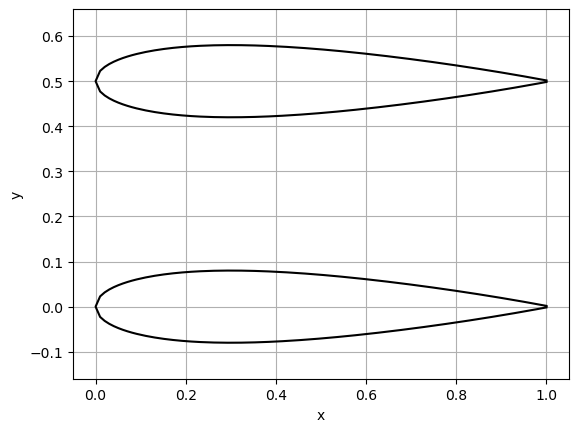

In [25]:
from aerofoil import *
from matplotlib import pyplot as plt

turbine_width = 0.5
foil_width = 0.16
t_c = 0.2
alphas = [0,0]

# x,y = custom_foil(foil_width, t_c,alpha=0, side='right')
# x2,y2 = custom_foil(foil_width, t_c,alpha=0, side='left')
# y2 = y2 + turbine_width

# Create a NACA 0012 aerofoil
x,y = naca_foil(foil_width, alpha=alphas[0])
x2,y2 = naca_foil(foil_width, alpha=alphas[1])
y2 = y2 + turbine_width

# x,y = naca_one_side(foil_width,side='left', alpha=alphas[0])
# x2,y2 = naca_one_side(foil_width,side='right', alpha = alphas[1])
# y2 = y2 + turbine_width

# Plot the aerofoil
plt.plot(x,y,'k-')
plt.plot(x2,y2,'k-')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()



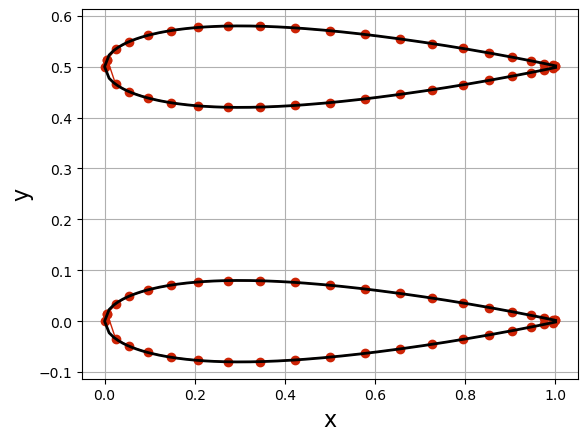

In [26]:
import numpy as np

plt.figure()
aerofoils = np.empty(2, dtype=object)
# aerofoils = np.empty(1, dtype=object)
coords = [[x,y],[x2,y2]]
# coords = [[x,y]]
# discretise the aerofoil into panels
for i,aerofoil in enumerate(coords):
    aerofoils[i] = define_panels(aerofoil[0],aerofoil[1],N=40, alpha=alphas[i])
    for panel in aerofoils[i]:
        panel.rotate_panel(alphas[i])
    plt.plot(np.append([panel.xa for panel in aerofoils[i]], aerofoils[i][0].xa),
            np.append([panel.ya for panel in aerofoils[i]], aerofoils[i][0].ya),
            linestyle='-', linewidth=1, marker='o', markersize=6, color='#CD2305')
    

plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, y, color='k', linestyle='-', linewidth=2)
plt.plot(x2, y2, color='k', linestyle='-', linewidth=2)




In [27]:
# define the freestream conditions
u_inf = 1.0
alpha = -5
freestream_1 = Freestream(u_inf, alpha)
freestream_2 = Freestream(u_inf, -alpha)
freestreams = [freestream_1, freestream_2]

In [28]:
for i,p in enumerate(aerofoils):  
    A = A_mat(p)
    b = b_vec(p, freestreams[i])

    # solve the linear system
    variables = np.linalg.solve(A, b)

    # store the source strength on each panel
    for ii, panel in enumerate(p):
        panel.sigma = variables[ii]

    # get tangential velocity at each panel center-point
    tan_vel(p, freestreams[i])
    # get pressure coefficient at each panel center-point
    cp(p, freestreams[i])

Velocity at x = 0.5, y = 0.5 is u = 1.0913092430475868 and v = -0.12854713024934336


Text(0.2, 0.25, '1.10')

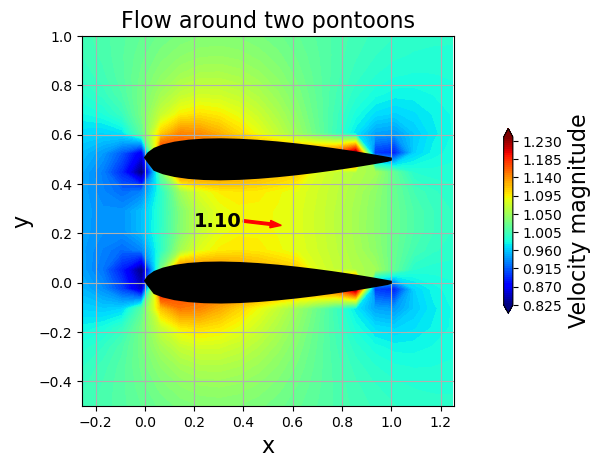

In [42]:
# define velocity field
nx, ny = 20, 20
x_start, x_end = -0.25, 1.25
y_start, y_end = -0.5, 1
x = np.linspace(x_start, x_end, nx)
y = np.linspace(y_start, y_end, ny)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.axis('equal')
# compute the velocity field on the mesh grid
u_tot = np.zeros((ny, nx))
v_tot = np.zeros((ny, nx))
for i,panels in enumerate(aerofoils):
    u, v = vel_field(panels, freestreams[i], X, Y)
    u_tot += u
    v_tot += v

# normalize the velocity field
u_tot /= 2 * u_inf
v_tot /= 2 * u_inf

# # plot the velocity field  
# plt.streamplot(X, Y, u_tot, v_tot, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

for panels in aerofoils:
    plt.fill([panel.xc for panel in panels],
        [panel.yc for panel in panels],
        color='k', linestyle='solid', linewidth=2, zorder=2)
    
# add contours of velocity
plt.contourf(X, Y, np.sqrt(u_tot**2 + v_tot**2), extend='both', cmap='jet', levels=100)

cbar = plt.colorbar(orientation='vertical', shrink=0.5, pad=0.1)
cbar.set_label('Velocity magnitude', fontsize=16)

plt.grid()
plt.title('Flow around two pontoons', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

# calculate velocity at x = 0.5, y = width/2
x = 0.4
y = turbine_width/2
u,v = vel_field(panels, freestreams[0], x, y)
print('Velocity at x = 0.5, y = 0.5 is u = {} and v = {}'.format(u,v))

# put an arrow there
plt.arrow(x, y, u/10, v/10, width=0.01, color='r')

# find the net velocity at this point
vel = np.sqrt(u**2 + v**2)
plt.text(x-0.2, y, '%.2f' %vel, fontsize=14, fontweight='bold', va='center')

